
**Título:** Análisis Exploratorio de Datos  
**Autores:** Tiffany Mendoza S. y Sergio Rada  

# Contexto inicial

La Unión Europea es la unión politica de estados que cooperan y coordinan sus gobiernos a traves de instituciones comunes como el Parlamento, el Consejo, el Tribunal de Justicia que velan por el bienestar integral de todos sus países miembro. Una de sus caracteristicas más llamativas es la unificación casi total de la moneda principal (El euro) utilizada para las actividades comerciales. Esta uniformidad posibilita la existencia de la infraestructura T2, que permite que las transferencias y movimientos bancarios se reflejen en tiempo real.

Aún así, es importante resaltar que no todos los estados que constituyen la UE utilizan el euro. De la misma manera, existen territorios como Andorra, Mónaco, San Marino que no pertenecen a la comunidad europea, pero sí utilizan el euro por tener acuerdos económicos particulares. Estas políticas son manejadas por el Banco Central Europeo, institución encargada de velar por la política monetaria de la zona euro. Es decir, es la entidad principal que busca preservar la estabilidad del poder adquisitivo del euro en el mediano y largo plazo.

## Objetivo del análisis
### Objetivo general
Construir un modelo de estimación capaz de identificar fraudes en transacciones en el dataset de movimientos bancarios de Europa.

### Objetivos específicos

- Analizar la calidad, cobertura y estructura de los datos.

- dentificar el set de caracteristicas orientadas a detectar fraude presentes en el dataset.

- Desarrollar el modelo de estimación que estime si una transaccion fue fraudulante dadas determinadas caracteristicas.
## Origen y descripción del dataset

El presente dataset muestra estadisticas de alto nivel sobre el total de transacciones financieras legales y fraudulentas realizadas en la Unión Europea. Esta información es recolectada por el Banco Central Europeo (ECB), entidad que valida semestralmente los reportes enviados por los Bancos Centrales Nacionales del continente. La última actualización fue realizada el 29 de enero del presente año y se encuentra disponible en el repositorio publico de datos del ECB.

### Caracterización general

Como veremos a continuación, el dataset cuenta con **662.616** transacciones caracterizadas en **29** columnas que serán descritas en la siguiente sección.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

datos = pd.read_csv("/Users/pctm/Downloads/data_payments.csv")

In [10]:
print(datos.shape)

print(datos.columns)

(662616, 29)
Index(['KEY', 'FREQ', 'REF_AREA', 'COUNT_AREA', 'TYP_TRNSCTN', 'RL_TRNSCTN',
       'FRD_TYP', 'TRANSFORMATION', 'UNIT_MEASURE', 'TIME_PERIOD', 'OBS_VALUE',
       'OBS_STATUS', 'CONF_STATUS', 'PRE_BREAK_VALUE', 'COMMENT_OBS',
       'TIME_FORMAT', 'BREAKS', 'COMMENT_TS', 'COMPILING_ORG', 'DISS_ORG',
       'TIME_PER_COLLECT', 'COVERAGE', 'DATA_COMP', 'DECIMALS', 'METHOD_REF',
       'TITLE', 'TITLE_COMPL', 'UNIT', 'UNIT_MULT'],
      dtype='object')


In [11]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662616 entries, 0 to 662615
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   KEY               662616 non-null  object 
 1   FREQ              662616 non-null  object 
 2   REF_AREA          662616 non-null  object 
 3   COUNT_AREA        662616 non-null  object 
 4   TYP_TRNSCTN       662616 non-null  object 
 5   RL_TRNSCTN        662616 non-null  object 
 6   FRD_TYP           662616 non-null  object 
 7   TRANSFORMATION    662616 non-null  object 
 8   UNIT_MEASURE      662616 non-null  object 
 9   TIME_PERIOD       662616 non-null  object 
 10  OBS_VALUE         518741 non-null  float64
 11  OBS_STATUS        662616 non-null  object 
 12  CONF_STATUS       662616 non-null  object 
 13  PRE_BREAK_VALUE   0 non-null       float64
 14  COMMENT_OBS       5165 non-null    object 
 15  TIME_FORMAT       662616 non-null  object 
 16  BREAKS            0 

### Diccionario de columnas

**1. KEY:** Clave compuesta de transacción

**2. FREQ:** Frecuencia con la que se realiza determinado pago (Anual, trimestral, semestral, etc.).

**3. REF_AREA:** País origen de la transacción.

**4. COUNT_AREA:** Institución origen de la transacción.

**5. TYP_TRNSCTN:** Clasificación de la transacción (Depósito, retiro, cheques, transferencias, etc.).

**6. RL_TRNSCTN:** Clasificación de la entidad procesa la transacción.

**7. FRD_TYP:** Clasificación del fraude (No autorizado, tarjeta robada, sin fraude, etc).

**8. TRANSFORMATION:** Transformación realizada a la transacción (niveles anuales, contribución a la tasa, promedio móvil, no aplica).

**9. UNIT_MEASURE:** Unidad o divisa involucrada en la transacción.

**10. TIME_PERIOD:** Año en el que se procesó la transacción.

**11. OBS_VALUE:** Monto de la transacción.

**12. OBS_STATUS:** Clasificación del monto de la transacción (revisado, no validado, valor provisional, etc).

**13. CONF_STATUS:** Clasificación de confidencialidad (Libre, restringido, etc).

**14. PRE_BREAK_VALUE:** No especificada en la documentación.

**15. COMMENT_OBS:** Observaciones.

**16. TIME_FORMAT:** No especificada en la documentación.

**17. BREAKS:** No especificada en la documentación.

**18. COMMENT_TS:** No especificada en la documentación.

**19. COMPILING_ORG:** No especificada en la documentación.

**20. DISS_ORG:** No especificada en la documentación.

**21. TIME_PER_COLLECT:** No especificada en la documentación.

**22. COVERAGE:** No especificada en la documentación.

**23. DATA_COMP:** No especificada en la documentación.

**24. DECIMALS:** Indica la cantidad de decimales presentes en el monto.

**25. METHOD_REF:** Metodolofia utilizada para la recolección del dato.

**26. TITLE:** Descripción de transacción.

**27. TITLE_COMPL:** Columna copia de TITLE.

**28. UNIT:** Columna copia de UNIT_MEASURE.

**29. UNIT_MULT:** Indica el multiplicador del monto de la transacción.

### Comprobación de columnas repetidas
#### UNIT_MEASURE == UNIT

In [19]:
#comprobar que las columnas UNIT_MEASURE y UNIT son iguales
print(datos['UNIT_MEASURE'].equals(datos['UNIT']))


True


#### TITLE == TITLE_COMPL

In [17]:
print(datos['TITLE'].equals(datos['TITLE_COMPL']))

True


### Columnas a utilizar

Si se analiza detenidamente, se encuentran varias columnas con información duplicada. Del mismo modo, hay columnas cuya información no se encuentra adecuadamente documentada dificultando así la clasificación de su impacto en el conjunto de datos. Por tanto, solo se tendrán en cuenta las columnas listadas a continuación: 

**1. KEY >> clave:** Clave compuesta de transacción.

**2. FREQ >> frecuencia:** Frecuencia con la que se realiza determinado pago (Anual, trimestral, semestral, etc.)

**3. REF_AREA >> pais_origen:** País origen de la transacción.

**4. COUNT_AREA >> pais_destino:** Institución origen de la transacción.

**5. TYP_TRNSCTN >> tipo_trx :** Clasificación de la transacción (Depósito, retiro, cheques, transferencias, etc.).

**6. RL_TRNSCTN >> tipo_psp :** Clasificación de la entidad procesa la transacción.

**7. FRD_TYP >> tipo_fraude:** Clasificación del fraude (No autorizado, tarjeta robada, sin fraude, etc).

**9. UNIT_MEASURE >> unidad:** Unidad o divisa involucrada en la transacción.

**10. TIME_PERIOD >> anio:** Año en el que se procesó la transacción.

**11. OBS_VALUE >> monto:** Monto de la transacción.

**12. OBS_STATUS >> tipo_monto:** Clasificación del monto de la transacción (revisado, no validado, valor provisional, etc).

**24. DECIMALS:** Indica la cantidad de decimales presentes en el monto.

**26. TITLE >> descripcion:** Descripción de transacción.

**29. UNIT_MULT:** Indica el multiplicador del monto de la transacción.

### Dataframe resultante

In [14]:
df = datos.rename(columns={
    'KEY':          'clave',
    'FREQ':         'frecuencia',
    'REF_AREA':     'pais_origen',
    'COUNT_AREA':   'pais_destino',
    'TYP_TRNSCTN':  'tipo_trx',
    'RL_TRNSCTN':   'tipo_psp',
    'FRD_TYP':      'tipo_fraude',
    'UNIT_MEASURE': 'unidad',
    'TIME_PERIOD':  'anio',
    'OBS_VALUE':    'monto',
    'OBS_STATUS':   'tipo_monto',
    'DECIMALS':     'decimales',
    'TITLE':        'descripcion',
    'UNIT_MULT':    'multiplicador_unidad'
})[[  
    'clave', 'frecuencia', 'pais_origen', 'pais_destino',
    'tipo_trx', 'tipo_psp', 'tipo_fraude', 'unidad',
    'anio', 'monto', 'tipo_monto', 'decimales',
    'descripcion', 'multiplicador_unidad'
]]

df.head()

,clave,frecuencia,pais_origen,pais_destino,tipo_trx,tipo_psp,tipo_fraude,unidad,anio,monto,tipo_monto,decimales,descripcion,multiplicador_unidad
0,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2014,0.242,A,3,"Total payment transactions, incl. cash withdra...",6
1,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2015,0.268,A,3,"Total payment transactions, incl. cash withdra...",6
2,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2016,0.689,A,3,"Total payment transactions, incl. cash withdra...",6
3,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2017,0.632,A,3,"Total payment transactions, incl. cash withdra...",6
4,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2018,0.615,A,3,"Total payment transactions, incl. cash withdra...",6


## Identificación de valores faltantes

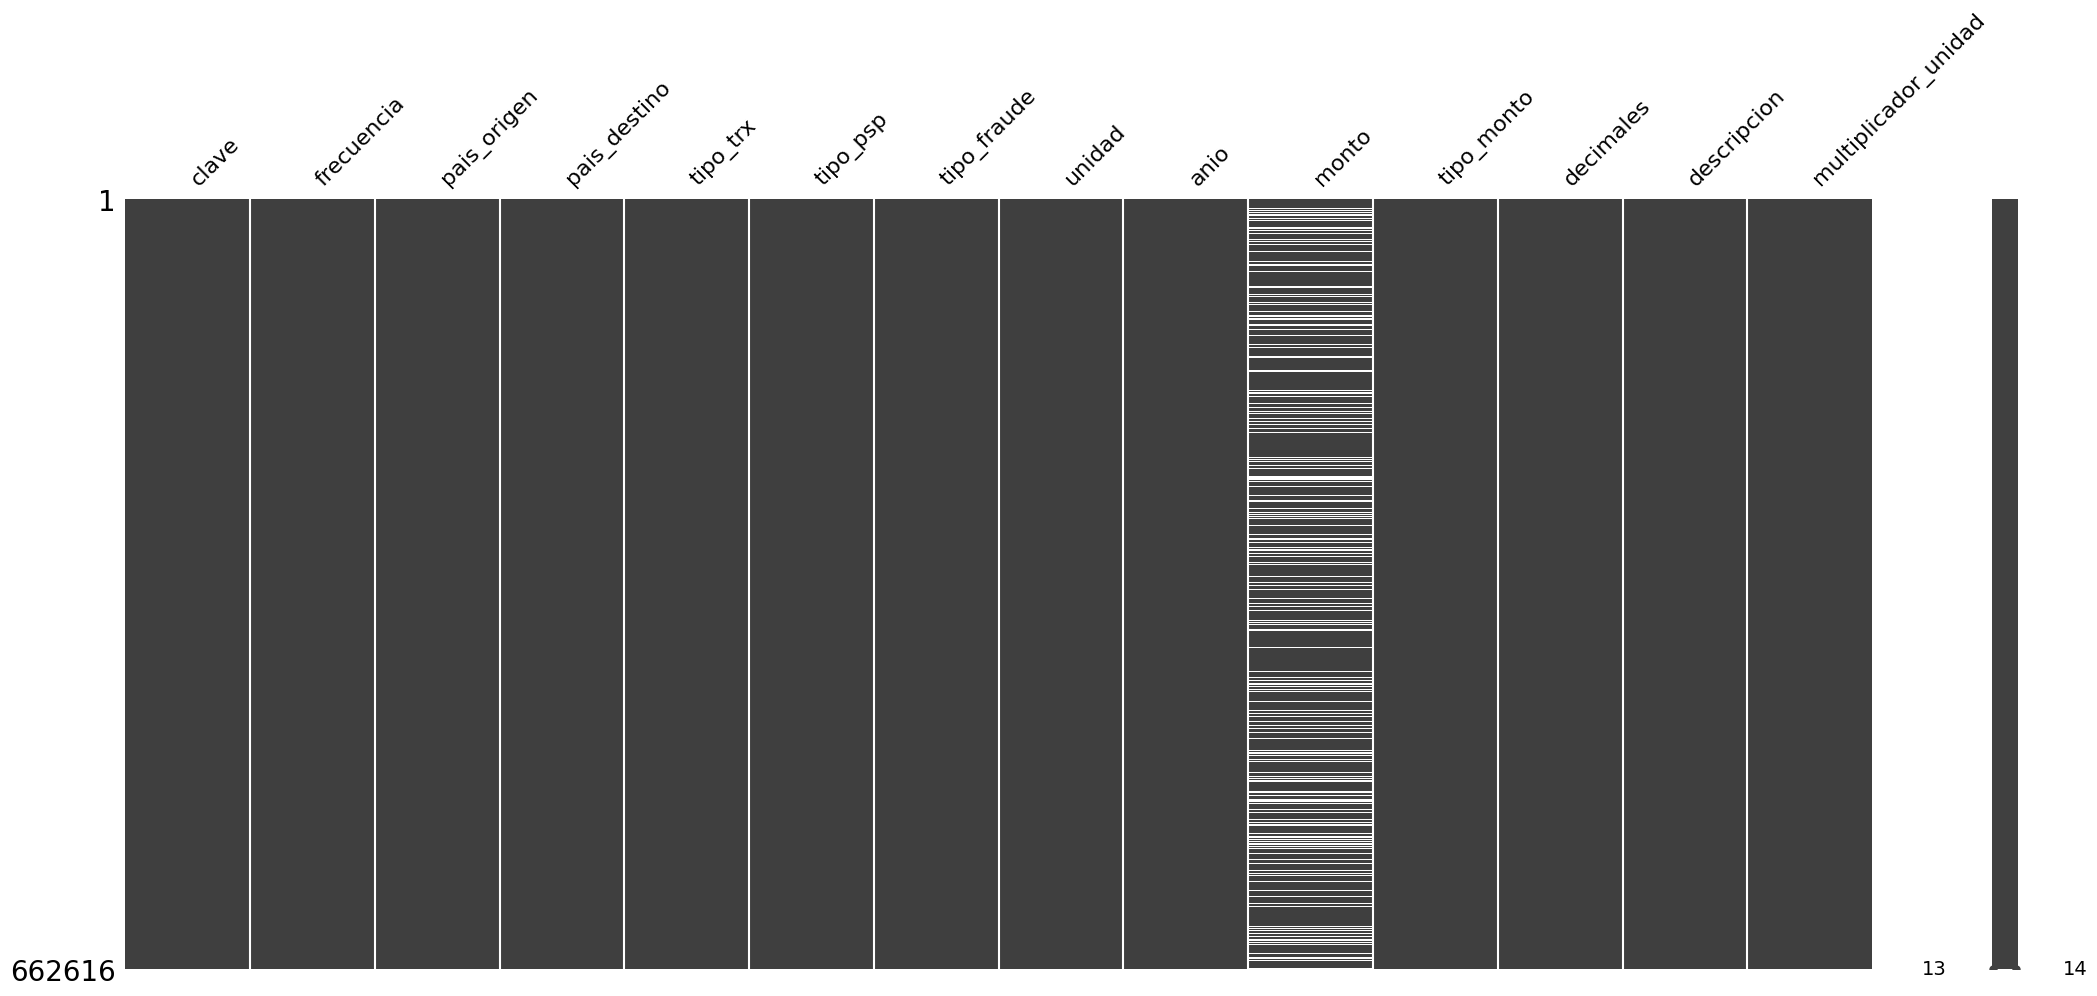

In [15]:
# Mapa de valores faltantes (equivalente a missmap() de Amelia en R)
msno.matrix(df)
plt.show()

In [16]:
df.isnull().sum().to_frame(name='NA_count')

,NA_count
clave,0
frecuencia,0
pais_origen,0
pais_destino,0
tipo_trx,0
tipo_psp,0
tipo_fraude,0
unidad,0
anio,0
monto,143875


Al explorar un poco más el dataset, se encuentra que la mayoría de columnas tienen 0 valores faltantes en las observaciones. Aún así, es importante destacar que la columna monto concentra el total de missing values con 143875 NAs.